<a href="https://colab.research.google.com/github/mralamdari/NLP-Latent-Semantic-Analysis/blob/main/NLP_Latent_Semantic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

In [6]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt

--2022-05-10 08:57:18--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127992 (125K) [text/plain]
Saving to: ‘all_book_titles.txt’

all_book_titles.txt 100%[===================>] 124.99K  --.-KB/s    in 0.008s  

2022-05-10 08:57:18 (15.5 MB/s) - ‘all_book_titles.txt’ saved [127992/127992]



In [59]:
titles = []
with open('all_book_titles.txt', 'r+') as f:
  for line in f:
    titles.append(line.rstrip())

In [60]:
titles[:20]

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism',
 'Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications',
 'American Anthem: Student Edition Modern Era 2007',
 'How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines',
 'Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication, Lasting Intimacy and Fulfillment, Giving and Receiving Love, Secrets of Passion, Understanding Martian',
 'Religious Traditions of the World A Journey Through Africa, Mesoamerica, North America, Judaism, Christianity, Islam, Hinduism, Buddhism, China, an',
 "World's Wisdom Sacred Texts of the World's Religions",
 "Illustrated World's Religions A Guide to Our Wisdom Traditions",
 'Soul of Sex Cu

In [30]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [31]:
stopwords[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [32]:
wordnet_lemmatizer = nltk.stem.WordNetLemmatizer()

In [102]:
def my_tokenizer(sentence):
  tokens = nltk.tokenize.word_tokenize(sentence.lower())
  # print(tokens)
  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens if len(t)>2]
  # print(tokens)
  tokens = [t for t in tokens if (t not in stopwords) and not (any(c.isdigit() for c in t))]
  return tokens

In [103]:
my_tokenizer('Hello, My name is Esi and I am 22 in 2022')

['hello', 'name', 'esi']

In [124]:
word2index = {}
index2word = []

current_index = 0

def word_tokenizer(titles):
  global word2index
  global current_index
  all_titles = []
  all_tokens = []

  for title in titles:
    all_titles.append(title)
    tokens = my_tokenizer(title)
    all_tokens.append(tokens)

    for token in tokens:
      if token not in word2index:
        word2index[token] = current_index
        current_index += 1
        index2word.append(token)
  return all_titles, all_tokens

In [125]:
def tokens2vector(tokens):
  x = np.zeros(len(word2index))
  for token in tokens:
    index = word2index.get(token)
    x[index] = 1
  return x

In [126]:
all_titles, all_tokens = word_tokenizer(titles)

In [127]:
all_tokens[20]

['pathophysiology', 'concept', 'health', 'care', 'professional']

In [135]:
x = np.zeros((len(word2index), len(all_tokens)))
index = 0
for token in all_tokens:
  x[:, index] = tokens2vector(token)
  index += 1

In [136]:
x[20]

array([0., 0., 0., ..., 0., 0., 0.])

In [137]:
x.shape

(2133, 2373)

In [138]:
svd = decomposition.TruncatedSVD()

In [139]:
z = svd.fit_transform(x)

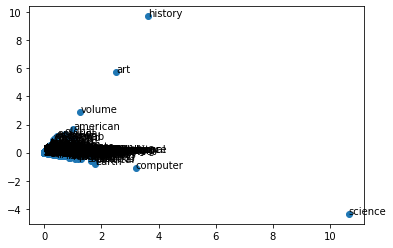

In [142]:
plt.scatter(z[:, 0], z[:, 1])
for i in range(len(word2index)):
  plt.annotate(s=index2word[i], xy=(z[i, 0], z[i, 1]))
plt.show()

In [144]:
z.shape

(2133, 2)

In [154]:
n = np.random.randint(z.shape[0])
print(z[n], '====> ', index2word[n])

[ 0.0092029  -0.00189645] ====>  microelectronics
